# Упражнение 04 : Гистограмма

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
con = sqlite3.connect('../data/checking-logs.sqlite')

* анализируйте только пользователей, а не администраторов
* создайте два списка значений (для рабочих дней и для выходных) для ввода в гистограмму
* размер рисунка остаётся прежним, вы можете выбрать размер шрифта, а также цветовую палитру
* используйте уровень прозрачности для гистограммы спереди, равный 0,7

In [9]:
sql = '''
SELECT uid, timestamp FROM checker
WHERE uid LIKE 'user_%'
'''
df_commit = pd.read_sql(sql, con, parse_dates=['timestamp'])
df_commit['hour'] = df_commit['timestamp'].dt.hour
df_commit['day_of_week'] = df_commit['timestamp'].dt.dayofweek
df_commit['day_of_week'] = df_commit['day_of_week'].apply(lambda x: 'weekend' if x >= 5 else 'working_day')
df_commit.drop('timestamp', axis=1, inplace=True)
df_commit

,uid,hour,day_of_week
0,user_4,5,working_day
1,user_4,5,working_day
2,user_4,5,working_day
3,user_4,5,working_day
4,user_4,5,working_day
...,...,...,...
3202,user_1,20,working_day
3203,user_1,20,working_day
3204,user_1,20,working_day
3205,user_1,20,working_day


In [10]:
weekend = df_commit[df_commit['day_of_week'] == 'weekend']['hour'].reset_index(drop=True)
working_day = df_commit[df_commit['day_of_week'] == 'working_day']['hour'].reset_index(drop=True)

In [11]:
weekend

0        7
1       13
2       13
3       13
4       13
        ..
1165    22
1166    22
1167    22
1168    22
1169    22
Name: hour, Length: 1170, dtype: int32

In [12]:
working_day

0        5
1        5
2        5
3        5
4        5
        ..
2032    20
2033    20
2034    20
2035    20
2036    20
Name: hour, Length: 2037, dtype: int32

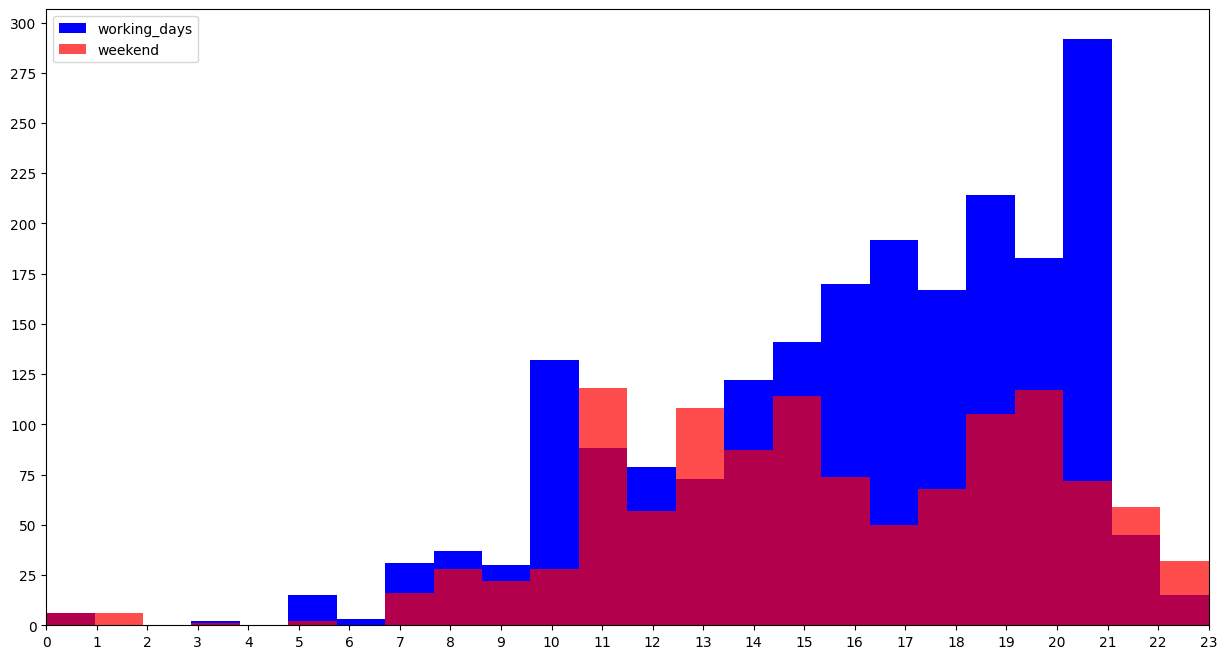

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(working_day,
        bins=24,
        label='working_days',
        color='b',)
ax.hist(weekend,
        bins=24,
        label='weekend',
        color='r',
        alpha=0.7)
ax.set_xlim(0, 23)
ax.legend(loc='upper left')
plt.xticks([i for i in range(0, 24)])
plt.yticks([i for i in range(0, 325, 25)])
plt.show()

* В конце блокнота Jupyter создайте ячейку с кодом и вставьте вопрос: «Бывают ли часы, когда общее количество коммитов в выходные дни выше, чем в рабочие?» В своём ответе приведите 4 примера.

In [14]:
df_commit = df_commit.groupby(['day_of_week', 'hour']).count().reset_index()
df_commit = pd.pivot_table(df_commit, values='uid', index='hour', columns='day_of_week')
df_commit = df_commit[df_commit['weekend'] > df_commit['working_day']]
df_commit

day_of_week,weekend,working_day
hour,,
11,118.0,88.0
13,108.0,73.0
22,59.0,45.0
23,32.0,15.0


In [15]:
con.close()